In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2

import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start_date = datetime(2011,1,1,0,0,0);
end_date = datetime(2011,2,1,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_110102_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_110109_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_110116_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_110123_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_110130_v1.03.ascii

Loading data for satellite  55
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns55/ns55_110102_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns55/ns55_110109_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-system

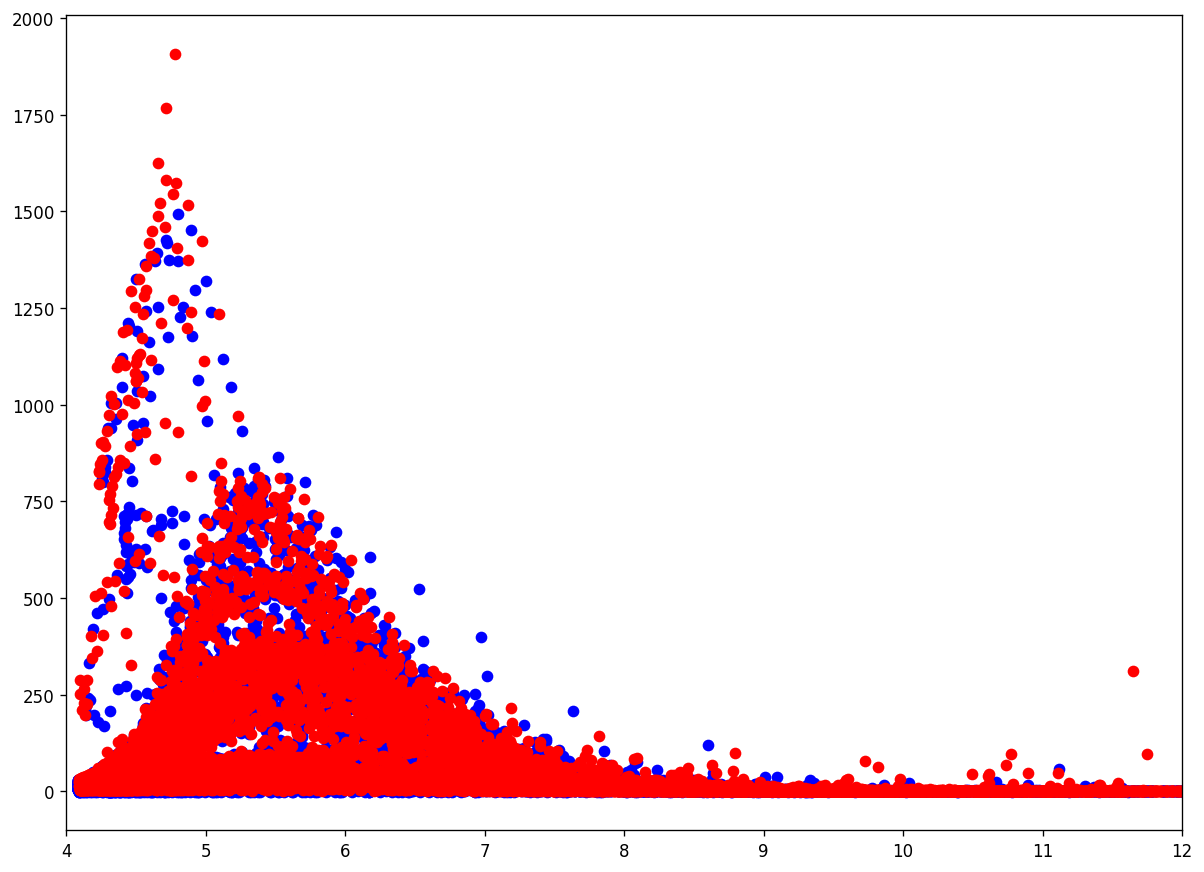

In [3]:
output_data = ms.get_all_data_by_satellite();
a = np.asarray(output_data[53]['rate_electron_measured'])[:,2]
c = np.asarray(output_data[55]['rate_electron_measured'])[:,2]
da = output_data[53]['L_shell']
dc = output_data[55]['L_shell']
#correlation =  np.correlate(a,c, 'full')
fig = plt.figure(figsize=(12, 9), dpi=120)
ax = fig.add_subplot(111)
plt.xlim(4,12)
ax.scatter(da, a, color = 'b')
ax.scatter(dc, c, color = 'r')
plt.show()

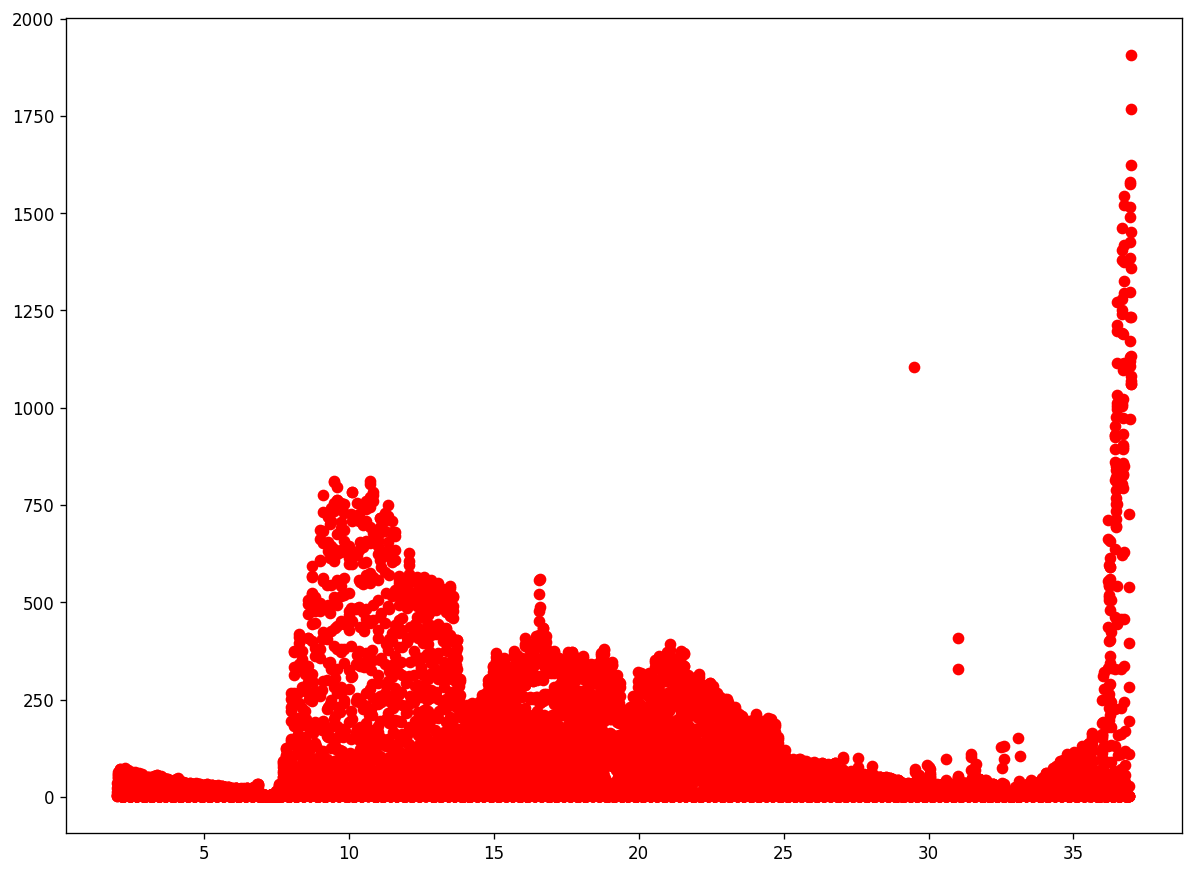

In [4]:
fig = plt.figure(figsize=(12, 9), dpi=120)
ax = fig.add_subplot(111)
#ax.scatter(output_data[53]['decimal_day'], a, color = 'b')
ax.scatter(output_data[55]['decimal_day'], c, color = 'r')
plt.show()

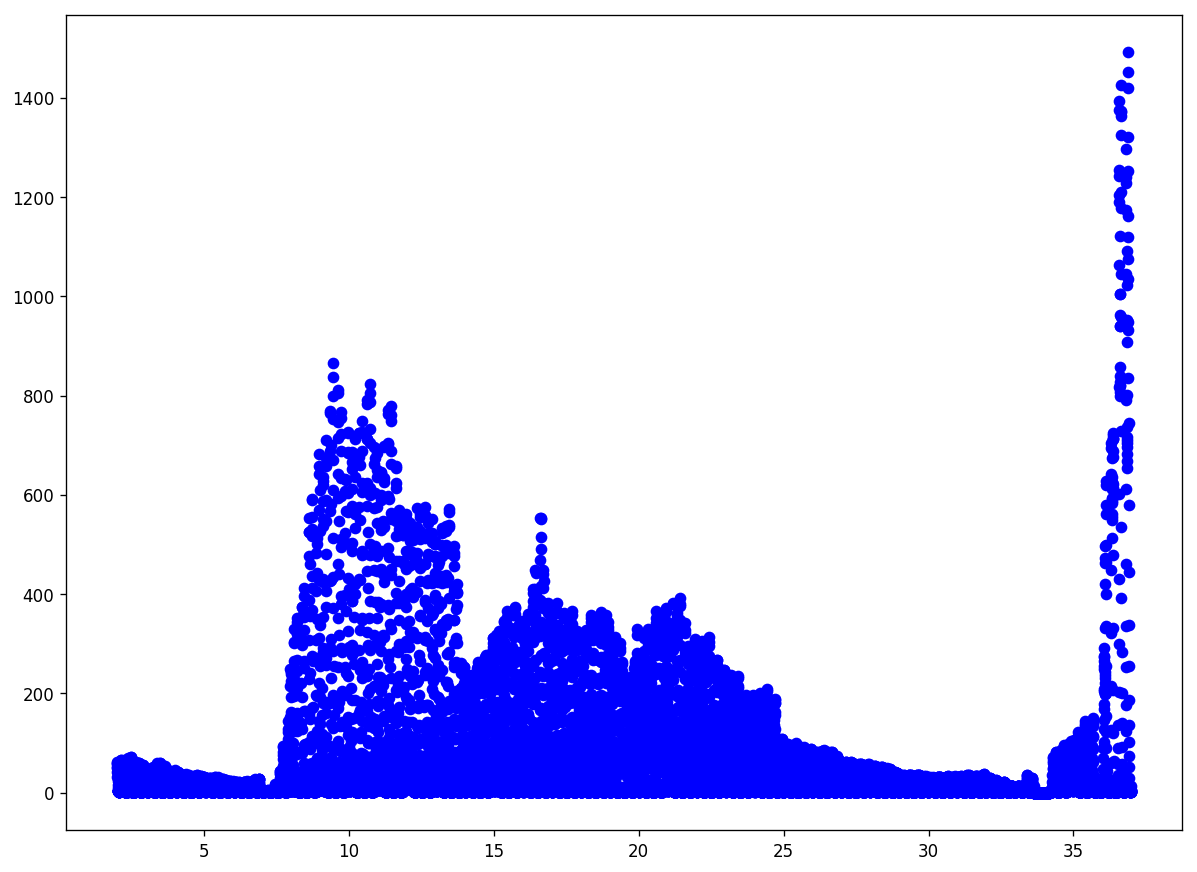

In [5]:
fig = plt.figure(figsize=(12, 9), dpi=120)
ax = fig.add_subplot(111)
ax.scatter(output_data[53]['decimal_day'], a, color = 'b')
#ax.scatter(output_data[55]['decimal_day'], c, color = 'r')
plt.show()

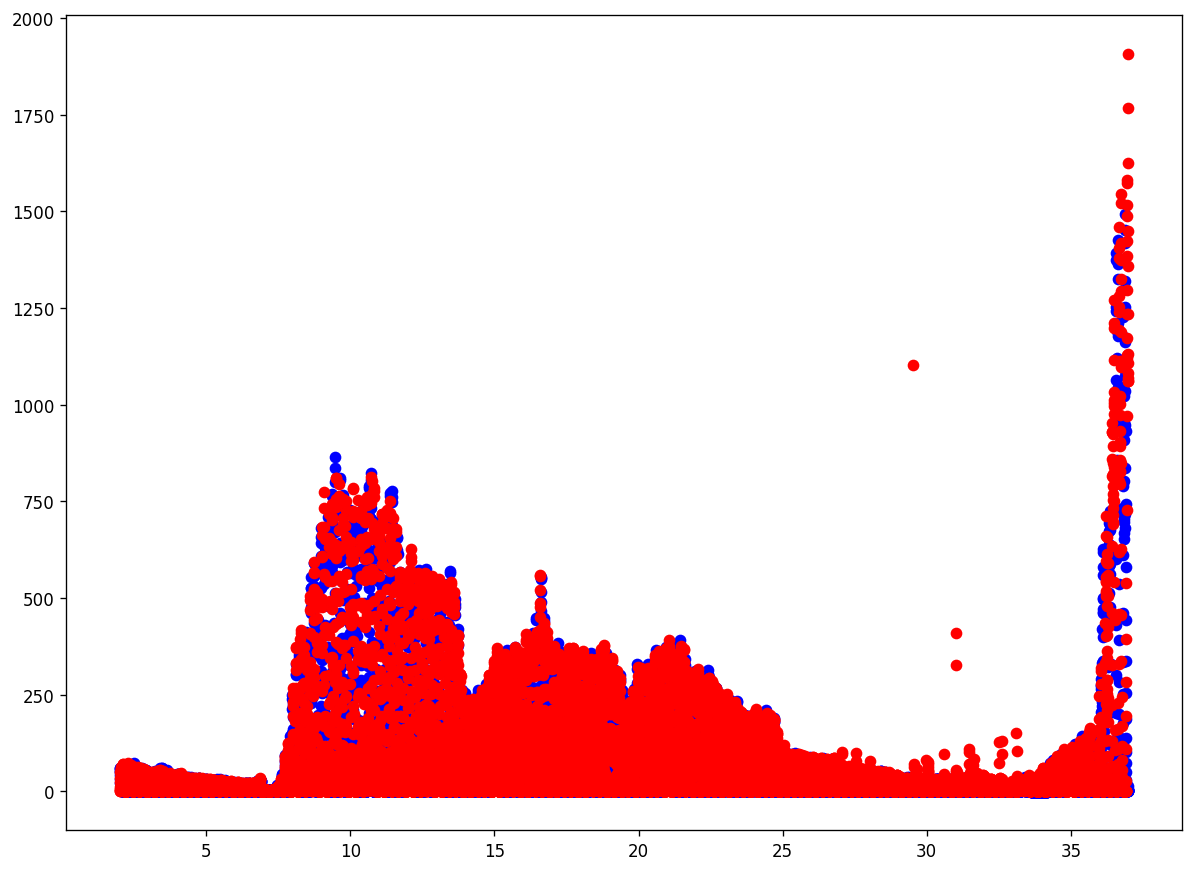

In [6]:
fig = plt.figure(figsize=(12, 9), dpi=120)
ax = fig.add_subplot(111)
ax.scatter(output_data[53]['decimal_day'], a, color = 'b')
ax.scatter(output_data[55]['decimal_day'], c, color = 'r')
plt.show()

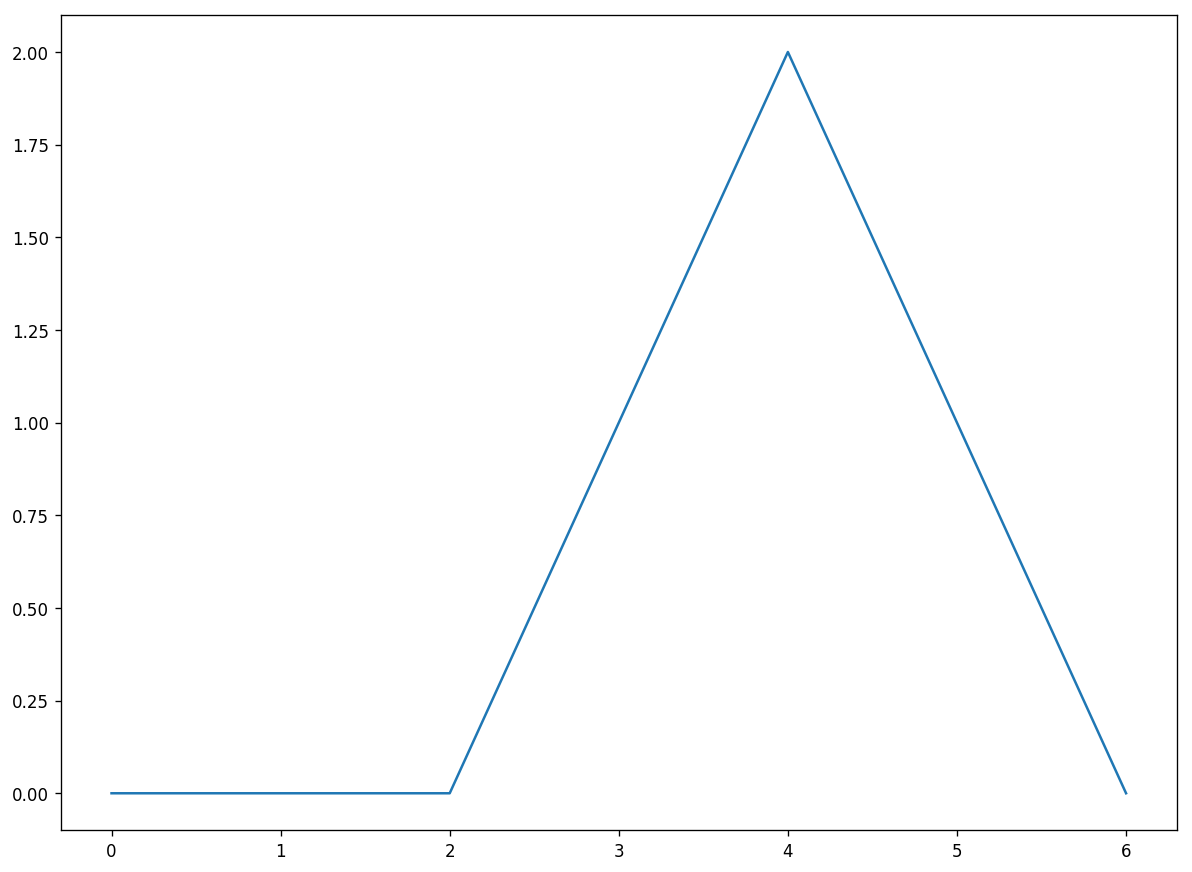

In [7]:
xx = np.array([0,0,1,1])
yy = np.array([0,1,1,0])
zz = np.correlate(xx,yy,'full')
plt.figure(figsize=(12, 9), dpi=120)
plt.plot(zz)
plt.show()

25200


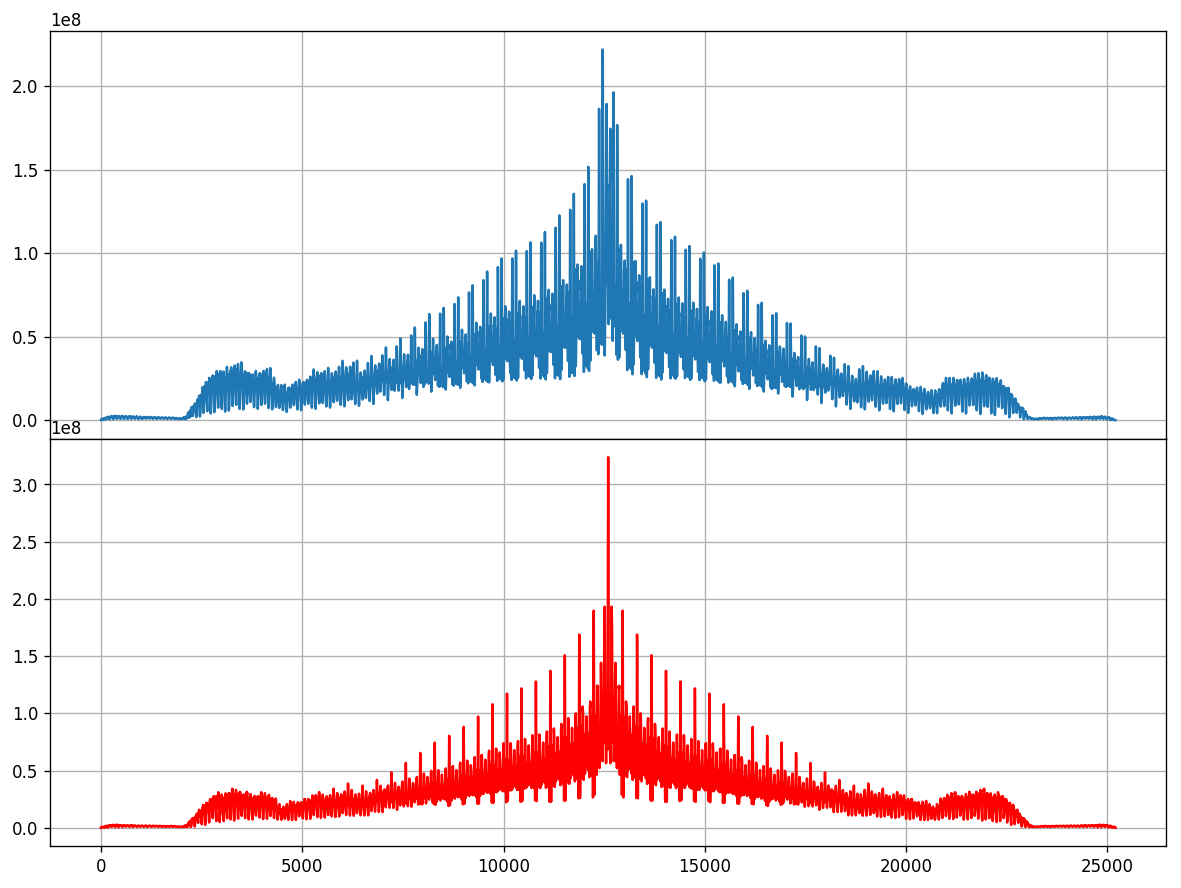

In [10]:
print len(a)+len(c)
bb = np.correlate(a,c, 'full')
fig = plt.figure(figsize=(12, 9), dpi=120)
gs = gridspec.GridSpec(2,1)
ax = plt.subplot(gs[0])
ax.grid()
ax.plot(bb)
ax1 = plt.subplot(gs[1], sharex = ax)
ctrl = np.correlate(c,c, 'full')
compare = ax1.plot(ctrl, color = 'r')
ax1.grid()
plt.subplots_adjust(hspace = .0)
plt.show()

In [11]:
print abs(np.argmax(bb) - np.argmax(ctrl))

135
